In [28]:
#Seniha Yarma
#ID 111732218

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from pprint import pprint as pp

In [29]:
#upload train file to notebook
train_raw = pd.read_csv('train.csv')
train_raw

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [30]:
#Clean the dataset, remove the outliers, before any data analysis. Explain what you did.
"""I dropped the Cabin column, because it was missing 687 people's information on the train dataset. Also, since 
we don't have any more information about the cabin number we don't know how to interpret its affect on survival 
rates. Age column had some missing number, because it has an important role in the analysis empty spots are filled 
with the average ticket class that it belong to. There wasn't any other outliers found on the dataset. So this was it for cleaning the dataset."""

train_raw['Cabin'].isna().sum() #687

train = train_raw.drop('Cabin', axis=1)

In [31]:
def train_fill_age(columns):
    age = columns[0]
    pclass = columns[1]

    if pd.isnull(age):
        if(pclass == 1):
            return train[train['Pclass'] == 1]['Age'].mean()
        elif(pclass == 2):
            return train[train['Pclass'] == 2]['Age'].mean()
        elif(pclass == 3):
            return train[train['Pclass'] == 3]['Age'].mean()
    else:
        return age
train['Age'] = train[['Age', 'Pclass']].apply(train_fill_age, axis = 1)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C


Text(0.5, 0, 'Ticket Class')

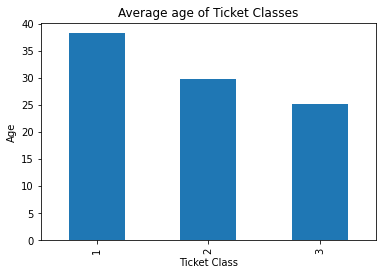

In [32]:
#Explore the socio-economic status of the passenger, is there any relationship between
#socio-economic status with other features, such as age, gender, number of family members on board
"""This plot shows the correlation of age and socio-economic status; Socio-economic status is decreasing when 
the age is decrasing."""

ageNotNan = train[train["Age"].notna()]
df = ageNotNan.groupby(['Pclass'])['Age'].mean()
df.plot.bar(x="class", y="age")

plt.title("Average age of Ticket Classes")
plt.ylabel("Age")
plt.xlabel("Ticket Class")

In [33]:
"""This shows the gender distribution of each ticket class. In general we can see that there was more male 
passenger. For classes, Class 2 was the least crowded and Class 3 was the most crowded."""
class_sex = train[['Pclass', 'Sex']]
female_class1 = train[(train["Pclass"] == 1) & (train["Sex"] == 'female')].PassengerId.count()
female_class2 = train[(train["Pclass"] == 2) & (train["Sex"] == 'female')].PassengerId.count()
female_class3 = train[(train["Pclass"] == 3) & (train["Sex"] == 'female')].PassengerId.count()
male_class1 = train[(train["Pclass"] == 1) & (train["Sex"] == 'male')].PassengerId.count()
male_class2 = train[(train["Pclass"] == 2) & (train["Sex"] == 'male')].PassengerId.count()
male_class3 = train[(train["Pclass"] == 3) & (train["Sex"] == 'male')].PassengerId.count()
female_total = female_class1 + female_class2 + female_class3
male_total = male_class1 + male_class2 + male_class3

data = {'Class 1': [female_class1, male_class1], 'Class 2': [female_class2, male_class2], 
        'Class 3': [female_class3, male_class3]}
df = pd.DataFrame(data, index=['Female', 'Male'])
print(df)

        Class 1  Class 2  Class 3
Female       94       76      144
Male        122      108      347


Text(0.5, 0, 'Ticket Class')

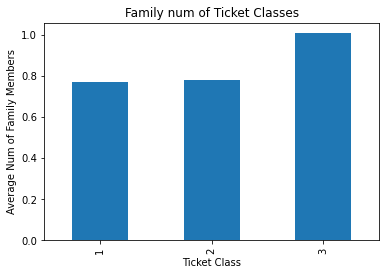

In [34]:
"""This shows the average number of family memeber in each ticket class. There was more families in Class 3 compare to 
other classes. But it has average of 1 family number, so we can see that there wasn't much families in Titanic."""
family_num = train["SibSp"] + train["Parch"]
train["family"] = family_num
train

df = train.groupby(['Pclass'])['family'].mean()
df.plot.bar(x="class", y="family_num")

plt.title("Family num of Ticket Classes")
plt.ylabel("Average Num of Family Members")
plt.xlabel("Ticket Class")

([<matplotlib.axis.XTick at 0x7f92043ddbe0>,
 [Text(0, 0, 'Died'), Text(1, 0, 'Survived')])

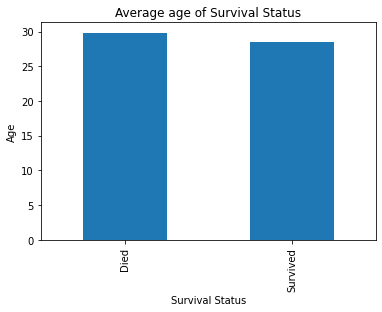

In [35]:
#Explore the distribution of survival victims in relation to age, gender, socioeconomic class
"""There isn't a big difference between average age for survival status. We can say that there wasn't any relation 
between survival status and age. Also, we see that the general average of the ship was around 27."""

ageNotNan = train[train["Age"].notna()]
df = ageNotNan.groupby(['Survived'])['Age'].mean()
df.plot.bar(x="survival", y="age")

plt.title("Average age of Survival Status")
plt.ylabel("Age")
plt.xlabel("Survival Status")
x = ["Died", "Survived"]
default_x_ticks = range(len(x))
plt.xticks(default_x_ticks, x)

In [36]:
"""This shows the gender distribution for survival status. We can see that female passenger was more focused in 
rescue time. Therefore more females were rescued."""
female_survived = train[(train["Survived"] == 1) & (train["Sex"] == 'female')].PassengerId.count()
female_notSurvived = train[(train["Survived"] == 0) & (train["Sex"] == 'female')].PassengerId.count()
male_survived = train[(train["Survived"] == 1) & (train["Sex"] == 'male')].PassengerId.count()
male_notSurvived = train[(train["Survived"] == 0) & (train["Sex"] == 'male')].PassengerId.count()

data = {'Survived': [female_survived, male_survived], 'Did Not Survive': [female_notSurvived, male_notSurvived]}
df = pd.DataFrame(data, index=['Female', 'Male'])
print(df)

        Survived  Did Not Survive
Female       233               81
Male         109              468


<AxesSubplot:xlabel='Survived', ylabel='count'>

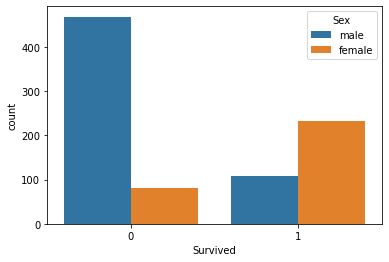

In [37]:
"""This shows it in the histogram."""
sb.countplot(x='Survived', hue='Sex', data=train)

([<matplotlib.axis.XTick at 0x7f920be67700>,
 [Text(0, 0, 'Died'), Text(1, 0, 'Survived')])

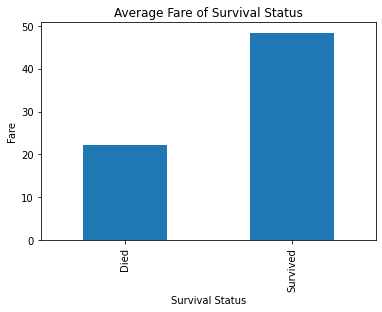

In [38]:
"""This shows the average fare for the survival status. We can see that who bought more expensive tickets has 
higher survival rate. So there is a relation between ticket classes and survival rate."""
df = train.groupby(['Survived'])['Fare'].mean()
df.plot.bar(x="survival", y="fare")

plt.title("Average Fare of Survival Status")
plt.ylabel("Fare")
plt.xlabel("Survival Status")
x = ["Died", "Survived"]
default_x_ticks = range(len(x))
plt.xticks(default_x_ticks, x)

In [39]:
"""This shows the correlation of each column in the dataset. We can see that Survival Rate and Fare has the highest 
correlation."""
correlations = train.corr()
correlations

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,family
PassengerId,1.000000,-0.005007,-0.035144,0.035256,-0.057527,-0.001652,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.050504,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.403858,0.083081,0.018443,-0.549500,0.065997
Age,0.035256,-0.050504,-0.403858,1.000000,-0.243452,-0.175799,0.120886,-0.254217
SibSp,-0.057527,-0.035322,0.083081,-0.243452,1.000000,0.414838,0.159651,0.890712
Parch,-0.001652,0.081629,0.018443,-0.175799,0.414838,1.000000,0.216225,0.783111
Fare,0.012658,0.257307,-0.549500,0.120886,0.159651,0.216225,1.000000,0.217138
family,-0.040143,0.016639,0.065997,-0.254217,0.890712,0.783111,0.217138,1.000000


In [40]:
print(correlations["Survived"])

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.050504
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
family         0.016639
Name: Survived, dtype: float64


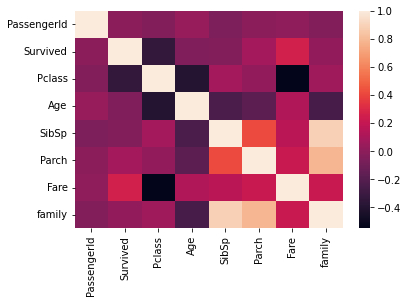

In [41]:
sb.heatmap(correlations)
plt.show()

In [42]:
#How can you extract information from the non-numerical features?
"""I dropped the rows which had missing data. Then converted sex column and embarked column into another column 
which has numerical value and they are now able to be processed in logistic regression model."""
train.dropna(inplace = True)
train_sex = pd.get_dummies(train['Sex'], drop_first = True)
train_embarked = pd.get_dummies(train['Embarked'], drop_first = True)

train = pd.concat([train, train_sex, train_embarked], axis = 1)
train.drop(['Name', 'Sex', 'Ticket', 'Embarked'], axis = 1, inplace = True)
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,family,male,Q,S
0,1,0,3,22.00000,1,0,7.2500,1,1,0,1
1,2,1,1,38.00000,1,0,71.2833,1,0,0,0
2,3,1,3,26.00000,0,0,7.9250,0,0,0,1
3,4,1,1,35.00000,1,0,53.1000,1,0,0,1
4,5,0,3,35.00000,0,0,8.0500,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.00000,0,0,13.0000,0,1,0,1
887,888,1,1,19.00000,0,0,30.0000,0,0,0,1
888,889,0,3,25.14062,1,2,23.4500,3,0,0,1
889,890,1,1,26.00000,0,0,30.0000,0,1,0,0


In [43]:
#Modeling and Question Answering
"""I used train data to create training and testing data set."""
x_train = train[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']]
y_train = train['Survived']
x_training, x_test, y_training, y_test = train_test_split(x_train, y_train, test_size = 0.3)

In [48]:
"""Created a logistic regression model using lover lbfgs. Solver lbfgs uses bfgs algorithm using small amount of 
computer memeory and this is also the default solver for logistic regression."""
model1 = LogisticRegression(solver='lbfgs').fit(x_training, y_training)
predictions = model1.predict(x_test)
pp(classification_report(y_test, predictions))

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.79      0.90      0.84       163\n'
 '           1       0.80      0.63      0.71       104\n'
 '\n'
 '    accuracy                           0.80       267\n'
 '   macro avg       0.80      0.77      0.78       267\n'
 'weighted avg       0.80      0.80      0.79       267\n')


/Users/senihayarma/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
"""Created a logistic regression model using lover newton-cg. Solver newton-cg uses Hessian algorithm however 
it can get computatinally expensive in high dimensions."""
model2 = LogisticRegression(solver='newton-cg').fit(x_training, y_training)
predictions = model2.predict(x_test)
pp(classification_report(y_test, predictions))

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.81      0.92      0.86       163\n'
 '           1       0.84      0.66      0.74       104\n'
 '\n'
 '    accuracy                           0.82       267\n'
 '   macro avg       0.83      0.79      0.80       267\n'
 'weighted avg       0.82      0.82      0.82       267\n')


In [46]:
"""Created a logistic regression model using lover liblinear. It is more efficient with small datasets."""
model3 = LogisticRegression(solver='liblinear').fit(x_training, y_training)
predictions = model3.predict(x_test)
pp(classification_report(y_test, predictions))

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.80      0.91      0.85       163\n'
 '           1       0.83      0.64      0.72       104\n'
 '\n'
 '    accuracy                           0.81       267\n'
 '   macro avg       0.81      0.78      0.79       267\n'
 'weighted avg       0.81      0.81      0.80       267\n')


In [47]:
"""In general for all three model has similar accuracy rate and they are higher than 80%. Which shows that they 
were able to learn well from the test dataset."""

'In general for all three model has similar accuracy rate and they are higher than 80%. Which shows that they \nwere able to learn well from the test dataset.'